# Project: TMDB-MOVIES-DATASET! ANALYSIS

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusion">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction
### i-Which dataset analyzed : TMDB Dataset
### ii-The questions posed : 
#### 1- Number of Movies released over years
#### 2- Movies profit over years
#### 3- Top 10 Directors over all time
#### 4- Top 10 Prodcution Companies over all time
#### 5- Top 10 Movie Genres over all time
#### 6- Top 10 actors over all time
#### 7- Top 10 watched movies
#### 8- Top 10 rated movies
#### 9- Top 10 popular movies
#### 10- Top 10 actors do which genres more ?

In [2]:
#pip pandas squarify --> if not installed
#pip numpy squarify --> if not installed
#pip matplotlib squarify --> if not installed
#pip seaborn squarify --> if not installed
#pip install squarify --> if not installed
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import squarify
import warnings
warnings.filterwarnings('ignore')

<a id='wrangling'></a>
## Data Wrangling


### 1-Data Head

In [3]:

filename  = "tmdb-movies.csv"

def get_data(filename):
    missing_values = ["n/a", "na", "--"," "]
    return pd.read_csv(filename,na_values = missing_values,sep=",")
df = get_data(filename)
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


### 2-Data Information 

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [4]:
print("The data has "+ str(df.shape[0]) +" Rows & " + str(df.shape[1])  + " Columns : ")
for col in df.columns:
    print(col)
    
print("We have "+ str(len(df["release_year"].unique())) + " years data from year " + str(df["release_year"].min()) + " to year " + str(df["release_year"].max()) + ": ")
print(df["release_year"].unique())

The data has 10866 Rows & 21 Columns : 
id
imdb_id
popularity
budget
revenue
original_title
cast
homepage
director
tagline
keywords
overview
runtime
genres
production_companies
release_date
vote_count
vote_average
release_year
budget_adj
revenue_adj
We have 56 years data from year 1960 to year 2015: 
[2015 2014 1977 2009 2010 1999 2001 2008 2011 2002 1994 2012 2003 1997
 2013 1985 2005 2006 2004 1972 1980 2007 1979 1984 1983 1995 1992 1981
 1996 2000 1982 1998 1989 1991 1988 1987 1968 1974 1975 1962 1964 1971
 1990 1961 1960 1976 1993 1967 1963 1986 1973 1970 1965 1969 1978 1966]


### 3-Check if there is any missing in data

There is missing in data
                 column  # of missings
0               imdb_id             10
1                  cast             76
2              homepage           7930
3              director             44
4               tagline           2824
5              keywords           1493
6              overview              4
7                genres             23
8  production_companies           1030


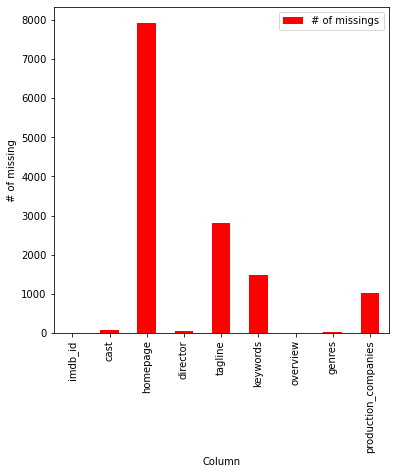

In [5]:
names = []
values = []
def check_missing(df):
    if df.isnull().values.any() :
        print("There is missing in data")
        return True
    else:
        print("Data is cleaned & ready to be analyzed")
        return False

            

if(check_missing(df)):
    for col_name in df.columns:
        if df[col_name].isnull().any() :
            #print(col_name + " column has "+str(df[col_name].isnull().sum())+" missing values")
            names.append(col_name)
            values.append(df[col_name].isnull().sum())
            
    missing = {"column":names,
              "# of missings":values}
    missingDf = pd.DataFrame(missing)
    print(missingDf)
    missingDf.plot.bar(x="column",y='# of missings', figsize=(6, 6),ylabel="# of missing",xlabel = "Column",color="red")



### Summary of the graph : 
####  The column with the highest number of missings is -> homepage
####  The column with the lowest number of missings is -> genres

### 4-Check if there is any duplicated data

In [6]:
df[df.duplicated(["original_title","id","imdb_id"])]

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
2090,42194,tt0411951,0.59643,30000000,967000,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,NaN,Dwight H. Little,Survival is no game,...,"In the year of 2039, after World Wars destroy ...",92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,3/20/10,110,5.0,2010,30000000.0,967000.0


<a id='dc'></a>
## Data Cleaning Part

### 1-Drop Unnecessary columns 

In [7]:
df = df.drop(["homepage","tagline","keywords","overview","budget_adj","revenue_adj","release_date"],axis=1)

### 2-Drop rows with missing values 

In [8]:
df = df.dropna()
assert check_missing(df) == False

Data is cleaned & ready to be analyzed


### 3-Drop Duplicates Rows 

In [9]:
df = df.drop_duplicates(["original_title","id","imdb_id"])

### 5-Sort data based on year and date

In [10]:
df = df.sort_values(by=["release_year"],ascending=True)

### Data After Cleaning

In [11]:
print("The new data has "+ str(df.shape[0]) +" Rows & " + str(df.shape[1])  + " Columns : ")
for col in df.columns:
    print(col)
df.head()


The new data has 9770 Rows & 14 Columns : 
id
imdb_id
popularity
budget
revenue
original_title
cast
director
runtime
genres
production_companies
vote_count
vote_average
release_year


,id,imdb_id,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,vote_count,vote_average,release_year
10172,1941,tt0053804,0.256779,0,0,Exodus,Paul Newman|Eva Marie Saint|Lee J. Cobb|Ralph ...,Otto Preminger,208,Action|Drama|History|War,Carlyle Productions,14,6.1,1960
10141,539,tt0054215,2.610362,806948,32000000,Psycho,Anthony Perkins|Vera Miles|John Gavin|Janet Le...,Alfred Hitchcock,109,Drama|Horror|Thriller,Shamley Productions,1180,8.0,1960
10142,966,tt0054047,1.872132,2000000,4905000,The Magnificent Seven,Yul Brynner|Eli Wallach|Steve McQueen|Charles ...,John Sturges,128,Action|Adventure|Western,The Mirisch Corporation|Alpha Productions,224,7.0,1960
10143,967,tt0054331,1.136943,12000000,60000000,Spartacus,Kirk Douglas|Laurence Olivier|Jean Simmons|Cha...,Stanley Kubrick,197,Action|Drama|History,Bryna Productions,211,6.9,1960
10144,284,tt0053604,0.947307,3000000,25000000,The Apartment,Jack Lemmon|Shirley MacLaine|Fred MacMurray|Ra...,Billy Wilder,125,Comedy|Drama|Romance,United Artists|The Mirisch Company,235,7.9,1960


<a id='eda'></a>
## Exploratory Data Analysis


### Research Question 1 : Movies released over time
#### Movies released over decades

In [12]:
df['decade'] = pd.cut(x=df['release_year'], bins=[1960, 1970, 1980, 1990 , 2000 , np.inf], labels=['the_60s', 'the_70s','the_80s', 'the_90s','the_2000s'], right=False)

Text(0.5, 0, 'Decade')

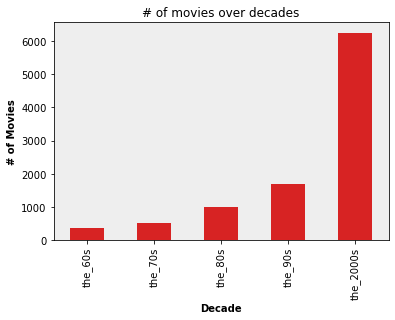

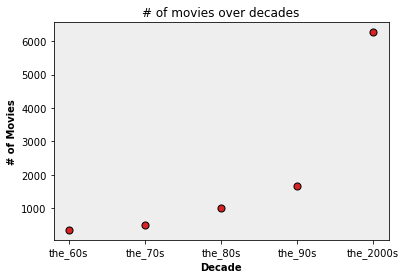

In [13]:
decade =  df['decade'].value_counts(sort=True,ascending=True)
decade.plot(kind="bar",title="# of movies over decades",color="#D72323")
ax2 = plt.axes()
ax2.set_facecolor("#EEEEEE")
plt.ylabel("# of Movies",fontweight='bold')
plt.xlabel("Decade",fontweight='bold')
df['decade'].value_counts().describe()

decade = decade.reset_index()
decade.columns = ['Decade', '# of Movies']
decade.plot.scatter(x="Decade",y="# of Movies",title="# of movies over decades",s=50,c="#D72323",edgecolor="black")
ax3 = plt.axes()
ax3.set_facecolor("#EEEEEE")
plt.ylabel("# of Movies",fontweight='bold')
plt.xlabel("Decade",fontweight='bold')

### Summary of the two graphs : 
####  The decade with the highest number of movies is -> the 60s decade
####  The decade with the lowest number of movies is -> the 2000s decade
#### There is a relation between the decades and the number of movies -> The number of movies is increased as the decade move forward

#### Movies released over years
##### 1-The 60's decade

count    10.000000
mean     34.700000
std       4.922736
min      29.000000
25%      30.500000
50%      34.000000
75%      36.750000
max      44.000000
Name: release_year, dtype: float64

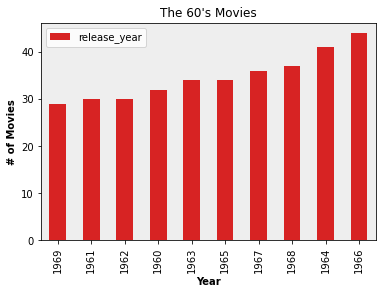

In [14]:
the_60s = pd.DataFrame(df[df["decade"] == "the_60s"].release_year.value_counts(sort=True,ascending=True))
the_60s.plot(kind="bar",title="The 60's Movies",color="#D72323")
ax = plt.axes()
ax.set_facecolor("#EEEEEE")
plt.ylabel("# of Movies",fontweight='bold')
plt.xlabel("Year",fontweight='bold')
df[df["decade"] == "the_60s"].release_year.value_counts(sort=False).describe()

### Summary of the graph : 
####  The year with the highest number of movies is ->1966
####  The year with the lowest number of movies is ->1969

##### 2-The 70's decade

count    10.0000
mean     49.1000
std       8.2253
min      37.0000
25%      42.5000
50%      50.5000
75%      55.0000
max      61.0000
Name: release_year, dtype: float64

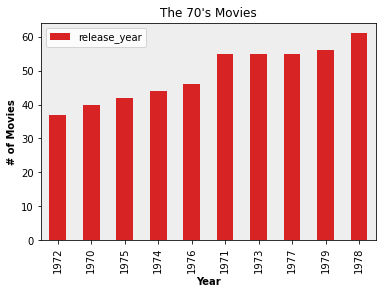

In [15]:
the_70s = pd.DataFrame(df[df["decade"] == "the_70s"].release_year.value_counts(sort=True,ascending=True))
the_70s.plot(kind="bar",title="The 70's Movies",color="#D72323")
ax = plt.axes()
ax.set_facecolor("#EEEEEE")
plt.ylabel("# of Movies",fontweight='bold')
plt.xlabel("Year",fontweight='bold')
df[df["decade"] == "the_70s"].release_year.value_counts(sort=False).describe()

### Summary of the graph : 
####  The year with the highest number of movies is ->1978
####  The year with the lowest number of movies is ->1972

##### 3-The 80's decade

count     10.000000
mean      99.500000
std       21.691012
min       73.000000
25%       78.500000
50%      102.500000
75%      112.000000
max      132.000000
Name: release_year, dtype: float64

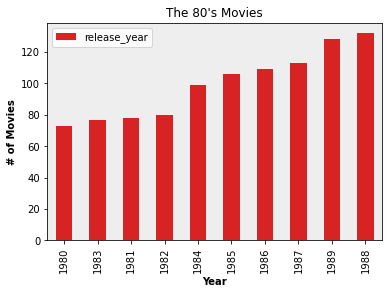

In [16]:
the_80s = pd.DataFrame(df[df["decade"] == "the_80s"].release_year.value_counts(sort=True,ascending=True))
the_80s.plot(kind="bar",title="The 80's Movies",color="#D72323")
ax = plt.axes()
ax.set_facecolor("#EEEEEE")
plt.ylabel("# of Movies",fontweight='bold')
plt.xlabel("Year",fontweight='bold')
df[df["decade"] == "the_80s"].release_year.value_counts(sort=False).describe()

### Summary of the graph : 
####  The year with the highest number of movies is ->1988
####  The year with the lowest number of movies is ->1980

##### 4-The 90's decade

count     10.000000
mean     167.200000
std       31.304242
min      125.000000
25%      137.000000
50%      173.000000
75%      188.250000
max      212.000000
Name: release_year, dtype: float64

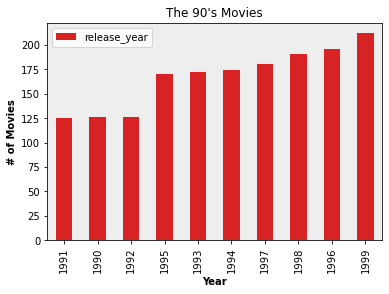

In [17]:
the_90s = pd.DataFrame(df[df["decade"] == "the_90s"].release_year.value_counts(sort=True,ascending=True))
the_90s.plot(kind="bar",title="The 90's Movies",color="#D72323")
ax = plt.axes()
ax.set_facecolor("#EEEEEE")
plt.ylabel("# of Movies",fontweight='bold')
plt.xlabel("Year",fontweight='bold')
df[df["decade"] == "the_90s"].release_year.value_counts(sort=False).describe()

### Summary of the graph : 
####  The year with the highest number of movies is -> 1999
####  The year with the lowest number of movies is -> 1991

##### 5-The 2000's decade

count     16.000000
mean     391.562500
std      136.786924
min      196.000000
25%      253.750000
50%      404.500000
75%      478.500000
max      635.000000
Name: release_year, dtype: float64

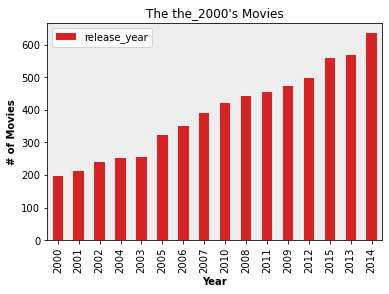

In [18]:
the_2000s = pd.DataFrame(df[df["decade"] == "the_2000s"].release_year.value_counts(sort=True,ascending=True))
the_2000s.plot(kind="bar",title="The the_2000's Movies",color="#D72323")
ax = plt.axes()
ax.set_facecolor("#EEEEEE")
plt.ylabel("# of Movies",fontweight='bold')
plt.xlabel("Year",fontweight='bold')
df[df["decade"] == "the_2000s"].release_year.value_counts(sort=False).describe()

### Summary of the graph : 
####  The year with the highest number of movies is -> 2014
####  The year with the lowest number of movies is -> 2000

### Research Question 2  : Movies profit over years


In [19]:
df["profit"] = df["revenue"]  - df["budget"]

#### Profit over decades

Text(0.5, 0, 'Decade')

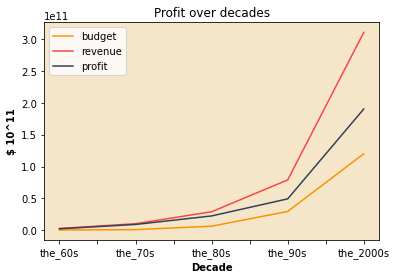

In [20]:
decades_profits = df[["decade","budget","revenue","profit"]]
#decades_profits.plot.barh()
decades_profits.groupby('decade')["budget","revenue","profit"].sum().plot.line(title="Profit over decades",color=["#FB9300","#F54748","#343F56"])
ax = plt.axes()
ax.set_facecolor("#F5E6CA")
plt.ylabel("$ 10^11",fontweight='bold')
plt.xlabel("Decade",fontweight='bold')

### Summary of the graph : 
####  The decade with the highest profit is -> The 2000s decade
####  The decade with the lowest profit is -> The 60s decade

#### Profit over years
##### 1-The 60's decade

                 budget    revenue     profit
release_year                                 
1960           22056948  145005000  122948052
1961           46137000  337720188  291583188
1962           54722126  215579846  160857720
1963           73331500  187404989  114073489
1964           39483161  340981782  301498621
1965           70205115  458081854  387876739
1966           57554800   84736689   27181889
1967          100652000  737834637  637182637
1968           71939000  264732980  192793980
1969           42129087  243957076  201827989


Text(0.5, 0, 'Release Year')

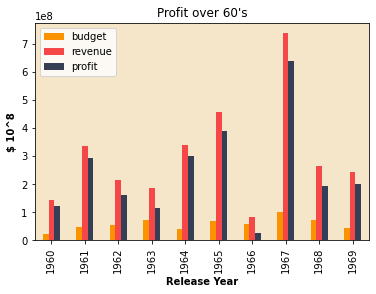

In [21]:
the_60s_profit = df[df['decade'] == "the_60s"]
the_60s_profit = the_60s_profit[["release_year","budget","revenue","profit"]]
the_60s_profit = (the_60s_profit.groupby('release_year')["budget","revenue","profit"].sum())
print(the_60s_profit)
the_60s_profit.groupby('release_year')["budget","revenue","profit"].sum().plot.bar(title="Profit over 60's",color=["#FB9300","#F54748","#343F56"])
ax = plt.axes()
ax.set_facecolor("#F5E6CA")
plt.ylabel("$ 10^8",fontweight='bold')
plt.xlabel("Release Year",fontweight='bold')

### Summary of the graph : 
####  The year with the highest profit is -> 1967
####  The year with the lowest profit is -> 1966

##### 2-The 70's decade

                 budget     revenue      profit
release_year                                   
1970          126961946   560221969   433260023
1971           75997000   404910610   328913610
1972           36279254   494730171   458450917
1973           65190783  1223981102  1158790319
1974           76970000   812539818   735569818
1975           56279000   957489966   901210966
1976          122150000   801005600   678855600
1977          161580000  2180583159  2019003159
1978          208997011  1353386659  1144389648
1979          254814000  1684794913  1429980913


Text(0.5, 0, 'Release Year')

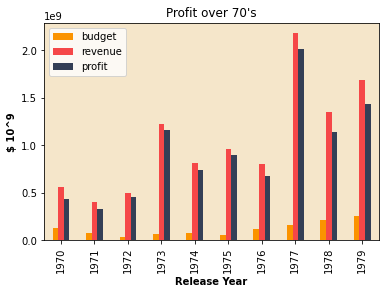

In [22]:
the_70s_profit = df[df['decade'] == "the_70s"]
the_70s_profit = the_70s_profit[["release_year","budget","revenue","profit"]]
the_70s_profit = (the_70s_profit.groupby('release_year')["budget","revenue","profit"].sum())
print(the_70s_profit)
the_70s_profit.groupby('release_year')["budget","revenue","profit"].sum().plot.bar(title="Profit over 70's",color=["#FB9300","#F54748","#343F56"])
ax = plt.axes()
ax.set_facecolor("#F5E6CA")
plt.ylabel("$ 10^9",fontweight='bold')
plt.xlabel("Release Year",fontweight='bold')

### Summary of the graph : 
####  The year with the highest profit is -> 1977
####  The year with the lowest profit is -> 1971

##### 3-The 80's decade

                  budget     revenue      profit
release_year                                    
1980           362500000  1768662387  1406162387
1981           338757786  1774606236  1435848450
1982           437795002  2458443852  2020648850
1983           518007412  2307529320  1789521908
1984           729211964  2635524418  1906312454
1985           748720637  2875772392  2127051755
1986           693711113  2998067061  2304355948
1987           709455811  3462104847  2752649036
1988           922848000  3738961360  2816113360
1989          1079656360  5164923718  4085267358


Text(0.5, 0, 'Release Year')

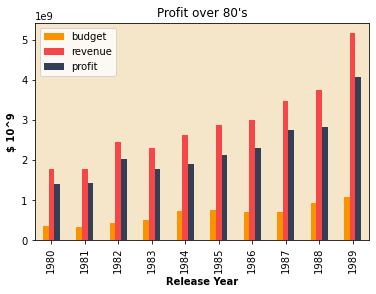

In [23]:
the_80s_profit = df[df['decade'] == "the_80s"]
the_80s_profit = the_80s_profit[["release_year","budget","revenue","profit"]]
the_80s_profit = (the_80s_profit.groupby('release_year')["budget","revenue","profit"].sum())
print(the_80s_profit)
the_80s_profit.groupby('release_year')["budget","revenue","profit"].sum().plot.bar(title="Profit over 80's",color=["#FB9300","#F54748","#343F56"])
ax = plt.axes()
ax.set_facecolor("#F5E6CA")
plt.ylabel("$ 10^9",fontweight='bold')
plt.xlabel("Release Year",fontweight='bold')

### Summary of the graph : 
####  The year with the highest profit is -> 1989
####  The year with the lowest profit is -> 1981

##### 4-The 90's decade

                  budget      revenue      profit
release_year                                     
1990          1278354025   5304688679  4026334654
1991          1466233000   4706599796  3240366796
1992          1433325538   6078153217  4644827679
1993          1777628653   6952183499  5174554846
1994          2220207032   7091078403  4870871371
1995          2831884377   9147263541  6315379164
1996          3671080000   8303862070  4632782070
1997          4751086675  10654899590  5903812915
1998          4493160000   9483866799  4990706799
1999          5745235106  11355712579  5610477473


Text(0.5, 0, 'Release Year')

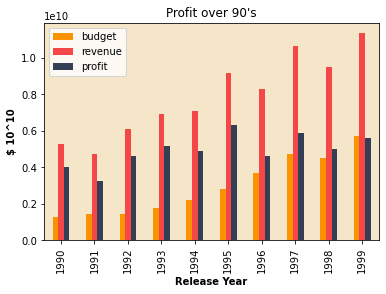

In [24]:
the_90s_profit = df[df['decade'] == "the_90s"]
the_90s_profit = the_90s_profit[["release_year","budget","revenue","profit"]]
the_90s_profit = (the_90s_profit.groupby('release_year')["budget","revenue","profit"].sum())
print(the_90s_profit)
the_90s_profit.groupby('release_year')["budget","revenue","profit"].sum().plot.bar(title="Profit over 90's",color=["#FB9300","#F54748","#343F56"])
ax = plt.axes()
ax.set_facecolor("#F5E6CA")
plt.ylabel("$ 10^10",fontweight='bold')
plt.xlabel("Release Year",fontweight='bold')

### Summary of the graph : 
####  The year with the highest profit is -> 1995
####  The year with the lowest profit is -> 1991

##### 5-The 2000's decade

                  budget      revenue       profit
release_year                                      
2000          5736200000  10919020206   5182820206
2001          5619029000  13359768166   7740739166
2002          5827640255  14616242508   8788602253
2003          6225857394  15129121970   8903264576
2004          7071090222  16747471351   9676381129
2005          7294284349  16505301325   9211016976
2006          7238785300  16251498200   9012712900
2007          7586846112  19403749169  11816903057
2008          7714762597  19298965733  11584203136
2009          8550794364  22175185155  13624390791
2010          9331845996  21955660121  12623814125
2011          8976589239  23688720350  14712131111
2012          8257783942  24633722334  16375938392
2013          9203619761  24700793311  15497173550
2014          7908350621  24329646567  16421295946
2015          7591947557  26759924070  19167976513


Text(0.5, 0, 'Release Year')

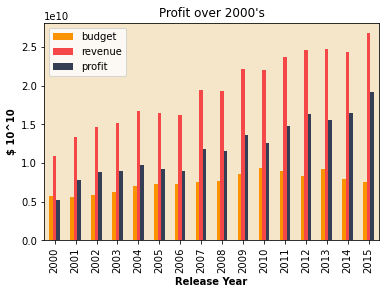

In [25]:
the_2000s_profit = df[df['decade'] == "the_2000s"]
the_2000s_profit = the_2000s_profit[["release_year","budget","revenue","profit"]]
the_2000s_profit = (the_2000s_profit.groupby('release_year')["budget","revenue","profit"].sum())
print(the_2000s_profit)
the_2000s_profit.groupby('release_year')["budget","revenue","profit"].sum().plot.bar(title="Profit over 2000's",color=["#FB9300","#F54748","#343F56"])
ax = plt.axes()
ax.set_facecolor("#F5E6CA")
plt.ylabel("$ 10^10",fontweight='bold')
plt.xlabel("Release Year",fontweight='bold')

### Summary of the graph : 
####  The year with the highest profit is -> 2015
####  The year with the lowest profit is -> 2000

### Research Question 3  : Top 10 Directors over all time


In [26]:
directors = pd.DataFrame(list(([i.strip() for i in '|'.join(df['director']).split('|')])))
directors.columns=["director name"]
directors = pd.DataFrame(directors.value_counts(ascending=True))
directors.columns=["# of movies"]
directors

,# of movies
director name,
A. Todd Smith,1
Lee Demarbre,1
Lee Friedlander,1
Lee Fulkerson,1
Lee H. Katzin,1
...,...
Ridley Scott,23
Martin Scorsese,28
Steven Spielberg,30


Text(0.5, 0, 'Director')

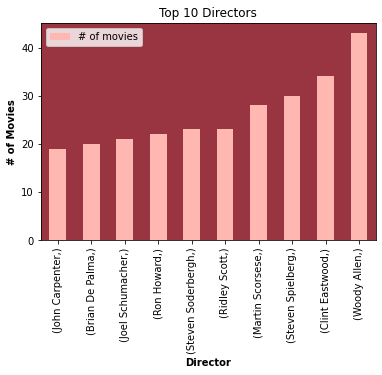

In [27]:
top_10_directors = directors[-10:]
#top_10_directors.plot.pie(y="# of Movies",figsize=(8,8),autopct=lambda p:f' {p*sum(subdi["# of Movies"])/100 :.0f} Movies',explode=[0.03]*10,title="Top 10 Directors",legend=False)
top_10_directors.plot.bar(title="Top 10 Directors",color="#ffb8b1")
ax = plt.axes()
ax.set_facecolor("#993441")
plt.ylabel("# of Movies",fontweight='bold')
plt.xlabel("Director",fontweight='bold')

### Summary of the graph : 
####  The director with the highest number of movies :  Woody Allen
####  The director with the lowest number of movies : John Carpenter

### Research Question 4  : Top 10 Prodcution Companies over all time


In [28]:
production_companies = pd.DataFrame(list(([i.strip() for i in '|'.join(df['production_companies']).split('|')])))
production_companies.columns=["Prodcution Company Name"]
production_companies = pd.DataFrame(production_companies.value_counts(ascending=True))
production_companies.columns=["# of movies"]
production_companies

,# of movies
Prodcution Company Name,
"""DIA"" Productions GmbH & Co. KG",1
Morabito Picture Company,1
Moonspun Films,1
Moonshot Pictures,1
Moonrise,1
...,...
Columbia Pictures,272
Twentieth Century Fox Film Corporation,282
Paramount Pictures,431


Text(0.5, 0, 'Production Company name')

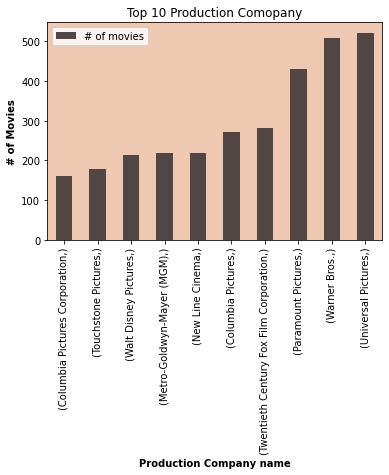

In [29]:
top_10_production_companies = production_companies[-10:]
#top_10_directors.plot.pie(y="# of Movies",figsize=(8,8),autopct=lambda p:f' {p*sum(subdi["# of Movies"])/100 :.0f} Movies',explode=[0.03]*10,title="Top 10 Directors",legend=False)
top_10_production_companies.plot.bar(title="Top 10 Production Comopany",color="#514644")
ax = plt.axes()
ax.set_facecolor("#efc8b1")
plt.ylabel("# of Movies",fontweight='bold')
plt.xlabel("Production Company name",fontweight='bold')

### Summary of the graph : 
####  The production company with the highest number of movies :  Universal Pictures
####  The  production company with the lowest number of movies : Columbia Pictures Corporation

### Research Question 5  : Top 10 Movie Genres over all time


In [30]:
genres = pd.DataFrame(list(([i.strip() for i in '|'.join(df['genres']).split('|')])))
genres.columns=["genre"]
genres = pd.DataFrame(genres.value_counts(ascending=True))
genres.columns=["# of movies"]
genres

,# of movies
genre,
Foreign,120
TV Movie,132
Western,160
War,258
History,306
Documentary,317
Music,339
Animation,615
Mystery,773


Text(0.5, 0, 'Genre')

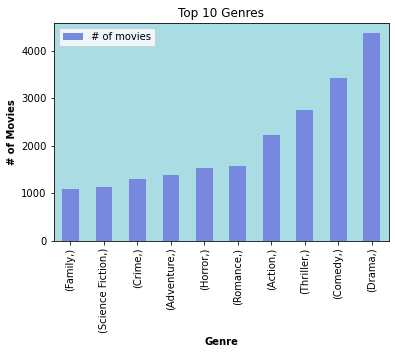

In [31]:
top_10_genres = genres[-10:]
#top_10_directors.plot.pie(y="# of Movies",figsize=(8,8),autopct=lambda p:f' {p*sum(subdi["# of Movies"])/100 :.0f} Movies',explode=[0.03]*10,title="Top 10 Directors",legend=False)
top_10_genres.plot.bar(title="Top 10 Genres",color="#7689de")
ax = plt.axes()
ax.set_facecolor("#a9dce3")
plt.ylabel("# of Movies",fontweight='bold')
plt.xlabel("Genre",fontweight='bold')

### Summary of the graph : 
####  The most popular genre : Drama

### Research Question 6  :  Top 10 actors over all time


In [32]:
actors = pd.DataFrame(list(([i.strip() for i in '|'.join(df['cast']).split('|')])))
actors.columns=["actor name"]
actors = pd.DataFrame(actors.value_counts(ascending=True))
actors.columns=["# of movies"]
actors

,# of movies
actor name,
"""Weird Al"" Yankovic",1
Luce Rains,1
Luciana Littizzetto,1
Luciana Paluzzi,1
Luciano Pavarotti,1
...,...
Michael Caine,52
Nicolas Cage,61
Bruce Willis,62


In [33]:
top_10_actors = actors[-10:]
top_10_actors

,# of movies
actor name,
Susan Sarandon,47
John Cusack,48
John Goodman,48
Morgan Freeman,49
Robin Williams,51
Michael Caine,52
Nicolas Cage,61
Bruce Willis,62
Samuel L. Jackson,70


Text(0.5, 0, 'Actor')

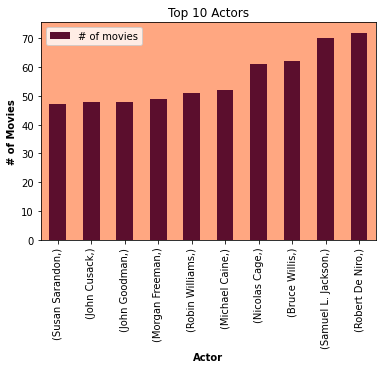

In [34]:
top_10_actors.plot.bar(title="Top 10 Actors",color="#5b0e2d")
ax = plt.axes()
ax.set_facecolor("#ffa781")
plt.ylabel("# of Movies",fontweight='bold')
plt.xlabel("Actor",fontweight='bold')

### Summary of the graph : 
####  Them actor with the highest number of movies :  Robert De Niro


### Research Question 7  :  Top 10 watched movies


In [35]:
movies_runtime = df[["original_title","runtime"]]
movies_runtime = movies_runtime.sort_values(by="runtime", ascending=True)
print(movies_runtime)
top_10_watched_movies = movies_runtime[-10:]
top_10_watched_movies

           original_title  runtime
486    If There Be Thorns        0
3857             Cell 213        0
6934        Jean-Philippe        0
4944  How to Fall in Love        0
5938          Go Goa Gone        0
...                   ...      ...
1865                 Life      500
2214          The Pacific      540
6176                Shoah      566
2722     Band of Brothers      705
4041                Taken      877

[9770 rows x 2 columns]


,original_title,runtime
4788,World Without End,389
2843,The Blue Planet,400
6008,Crystal Lake Memories: The Complete History of...,400
2170,The Pillars of the Earth,421
3141,Generation Kill,470
1865,Life,500
2214,The Pacific,540
6176,Shoah,566
2722,Band of Brothers,705
4041,Taken,877


Text(0.5, 0, 'Movie')

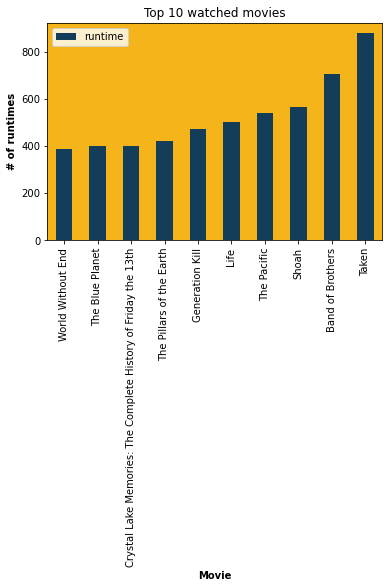

In [36]:
top_10_watched_movies.plot.bar(x="original_title",y="runtime",title="Top 10 watched movies",color="#143d59")
ax = plt.axes()
ax.set_facecolor("#f4b41a")
plt.ylabel("# of runtimes",fontweight='bold')
plt.xlabel("Movie",fontweight='bold')

### Summary of the graph : 
####  The Movie with the highest number of watches :  Taken

### Research Question 8 :  Top 10 rated movies

In [37]:
movies_rates = df[["original_title","vote_average"]]
movies_rates = movies_rates.sort_values(by="vote_average", ascending=True)
print(movies_rates)
top_10_rated_movies = movies_rates[-10:]
top_10_rated_movies

                                          original_title  vote_average
10865                           Manos: The Hands of Fate           1.5
7772                                       Transmorphers           1.5
4882                                      Jurassic Shark           2.0
3822                                         Sand Sharks           2.1
7220                        Superbabies: Baby Geniuses 2           2.1
...                                                  ...           ...
4178                            The Shawshank Redemption           8.4
8411                               Queen - Rock Montreal           8.5
8221   A Personal Journey with Martin Scorsese Throug...           8.5
3690                                   The Art of Flight           8.5
6911                                   Pink Floyd: Pulse           8.7

[9770 rows x 2 columns]


,original_title,vote_average
6176,Shoah,8.3
3310,Dear Zachary: A Letter to a Son About His Father,8.3
7948,Stop Making Sense,8.4
609,The Jinx: The Life and Deaths of Robert Durst,8.4
5986,"Guten Tag, RamÃ³n",8.4
4178,The Shawshank Redemption,8.4
8411,Queen - Rock Montreal,8.5
8221,A Personal Journey with Martin Scorsese Throug...,8.5
3690,The Art of Flight,8.5
6911,Pink Floyd: Pulse,8.7


Text(0.5, 0, 'Movie')

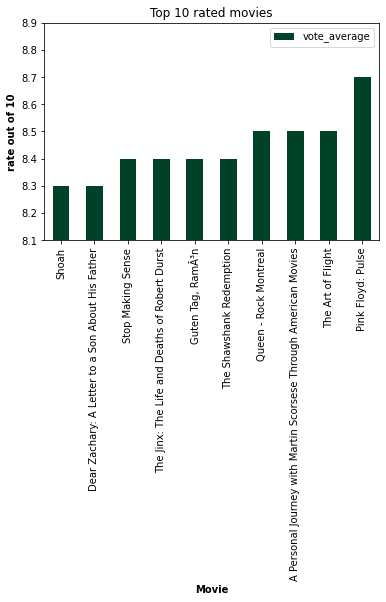

In [38]:
top_10_rated_movies.plot.bar(x="original_title",y="vote_average",title="Top 10 rated movies",color="#004228")
ax = plt.axes()
ax.set_facecolor("#ffffff")
plt.ylim(top_10_rated_movies.vote_average.min() - 0.2, top_10_rated_movies.vote_average.max() + 0.2)
plt.ylabel("rate out of 10",fontweight='bold')
plt.xlabel("Movie",fontweight='bold')

### Summary of the graph : 
####  The Movie with the highest rate  :  Pink Floyd: Pulse

### Research Question 9 :  Top 10 popular movies

In [39]:
movies_popularity = df[["original_title","popularity"]]
movies_popularity = movies_popularity.sort_values(by="popularity", ascending=True)
print(movies_popularity)
top_10_popular_movies = movies_popularity[-10:]
top_10_popular_movies

                  original_title  popularity
9977                The Hospital    0.000188
6080                      G.B.F.    0.000620
6551  Mon petit doigt m'a dit...    0.000973
6961           Khosla Ka Ghosla!    0.001115
3370              Fuera de carta    0.001317
...                          ...         ...
2                      Insurgent   13.112507
630      Guardians of the Galaxy   14.311205
629                 Interstellar   24.949134
1             Mad Max: Fury Road   28.419936
0                 Jurassic World   32.985763

[9770 rows x 2 columns]


,original_title,popularity
633,The Hunger Games: Mockingjay - Part 1,10.739009
3,Star Wars: The Force Awakens,11.173104
632,John Wick,11.422751
1329,Star Wars,12.037933
631,Captain America: The Winter Soldier,12.971027
2,Insurgent,13.112507
630,Guardians of the Galaxy,14.311205
629,Interstellar,24.949134
1,Mad Max: Fury Road,28.419936
0,Jurassic World,32.985763


Text(0.5, 0, 'Movie')

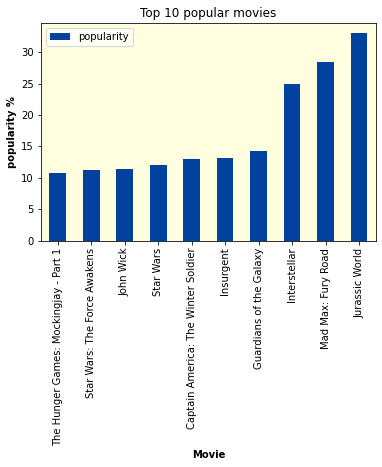

In [40]:
top_10_popular_movies.plot.bar(x="original_title",y="popularity",title="Top 10 popular movies",color="#00429d")
ax = plt.axes()
ax.set_facecolor("#ffffe0")
#plt.ylim(top_10_popular_movies.popularity.min() - 0.2, top_10_popular_movies.popularity.max() + 0.2)
plt.ylabel("popularity %",fontweight='bold')
plt.xlabel("Movie",fontweight='bold')

### Summary of the graph : 
####  The most popular movie :  Jurassic World

### Research Question 10 :  Top 10 actors do which genres more ?

In [41]:

genres_list = list(set([i.strip() for i in '|'.join(df['genres']).split('|')]))
print(genres_list)
def get_actor_genre(actor_name,genres_list):
    actor_genres = {}
    for i in range(len(genres_list)):
        genre_filter = df[df['genres'].astype(str).str.contains(genres_list[i])]
        actor_filter = genre_filter[genre_filter['cast'].astype(str).str.contains(actor_name)]
        number_of_movies = actor_filter.value_counts().sum()
        actor_genres[genres_list[i]] = number_of_movies
    
    actor_genres_count = pd.DataFrame(actor_genres, index = np.arange(1) )
    actor_genres_count = actor_genres_count.transpose()
    actor_genres_count.columns=["# of movies"]
    actor_genres_count = actor_genres_count[actor_genres_count["# of movies"] > 0]
    
    return actor_genres_count.sort_values(by = "# of movies",ascending=True)

['Music', 'Action', 'History', 'TV Movie', 'Romance', 'Drama', 'Documentary', 'Thriller', 'Western', 'Foreign', 'Adventure', 'Mystery', 'Comedy', 'Fantasy', 'Animation', 'Crime', 'War', 'Family', 'Horror', 'Science Fiction']


##### 1- Robert De Niro

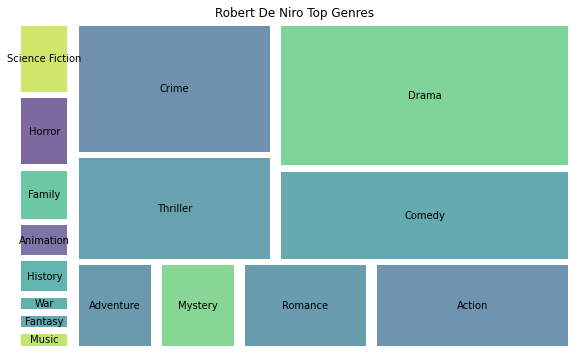

In [42]:
Robert_De_Niro_genres = get_actor_genre("Robert De Niro",genres_list)
#Robert_De_Niro_genres.plot.pie(y="# of movies",legend=False,figsize=(10,10),title="Robert De Niro Top Genres")
fig = plt.figure() 
fig.set_size_inches(10, 6)
squarify.plot(sizes=Robert_De_Niro_genres['# of movies'], label=Robert_De_Niro_genres.index, alpha=0.7,pad = True )
plt.title("Robert De Niro Top Genres")

plt.axis('off')
plt.show()

### Summary of the graph : 
####  Most of the movies of Robert De Niro in :  Drama

##### 2- Samuel L. Jackson	

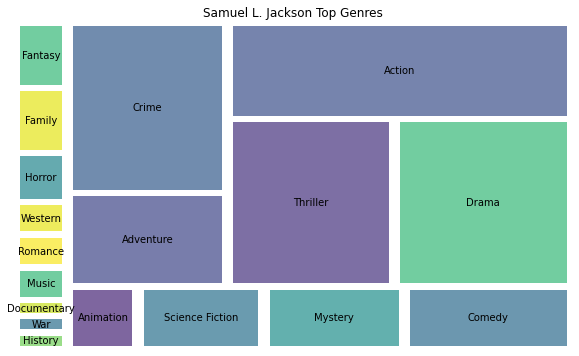

In [43]:
Samuel_L_Jackson_genres = get_actor_genre("Samuel L. Jackson",genres_list)
#Samuel_L_Jackson_genres.plot.pie(y="# of movies",legend=False,figsize=(10,10),title="Samuel L. Jackson Top Genres")
fig = plt.figure() 
fig.set_size_inches(10, 6)
squarify.plot(sizes=Samuel_L_Jackson_genres['# of movies'], label=Samuel_L_Jackson_genres.index, alpha=0.7,pad = True )
plt.axis('off')
plt.title("Samuel L. Jackson Top Genres")
plt.show()

### Summary of the graph : 
####  Most of the movies of Samuel L. Jackson in :  Action

#### 3- Bruce Willis

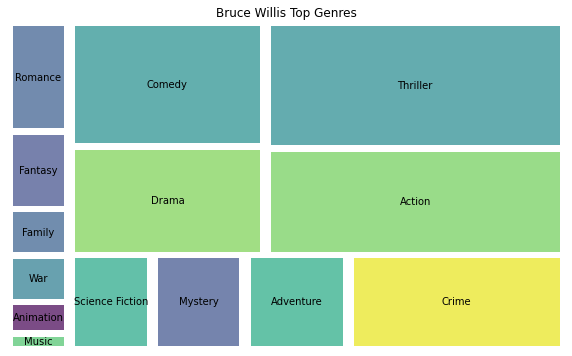

In [44]:
Bruce_Willis_genres = get_actor_genre("Bruce Willis",genres_list)
#Bruce_Willis_genres.plot.pie(y="# of movies",legend=False,figsize=(10,10),title="Bruce Willis Top Genres")
fig = plt.figure() 
fig.set_size_inches(10, 6)
squarify.plot(sizes=Bruce_Willis_genres['# of movies'], label=Bruce_Willis_genres.index, alpha=0.7,pad = True )
plt.axis('off')
plt.title("Bruce Willis Top Genres")
plt.show()

### Summary of the graph : 
####  Most of the movies of Bruce Willis in :  Thriller

#### 4- Nicolas Cage

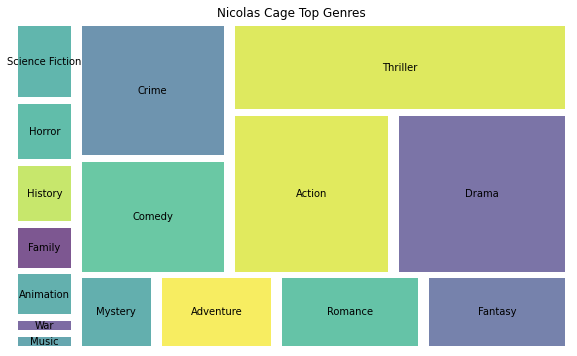

In [45]:
Nicolas_Cage_genres = get_actor_genre("Nicolas Cage",genres_list)
#Nicolas_Cage_genres.plot.pie(y="# of movies",legend=False,figsize=(10,10),title="Nicolas Cage Top Genres")
fig = plt.figure() 
fig.set_size_inches(10, 6)
squarify.plot(sizes=Nicolas_Cage_genres['# of movies'], label=Nicolas_Cage_genres.index, alpha=0.7,pad = True )
plt.axis('off')
plt.title("Nicolas Cage Top Genres")
plt.show()

### Summary of the graph : 
####  Most of the movies of Nicolas Cage in :  Thriller

#### 5- Michael Caine

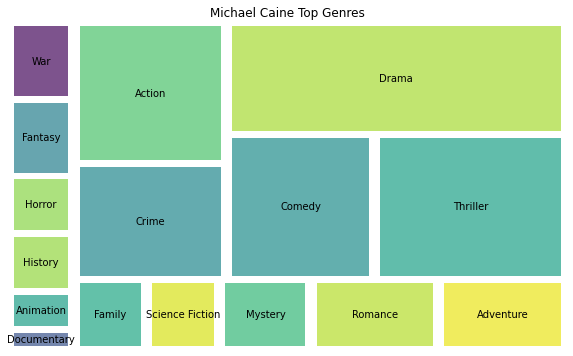

In [46]:
Michael_Caine_genres = get_actor_genre("Michael Caine",genres_list)
#Michael_Caine_genres.plot.pie(y="# of movies",legend=False,figsize=(10,10),title="Michael Caine Top Genres")
fig = plt.figure() 
fig.set_size_inches(10, 6)
squarify.plot(sizes=Michael_Caine_genres['# of movies'], label=Michael_Caine_genres.index, alpha=0.7,pad = True )
plt.axis('off')
plt.title("Michael Caine Top Genres")
plt.show()

### Summary of the graph : 
####  Most of the movies of Michael Caine in :  Drama

#### 6 -Robin Williams

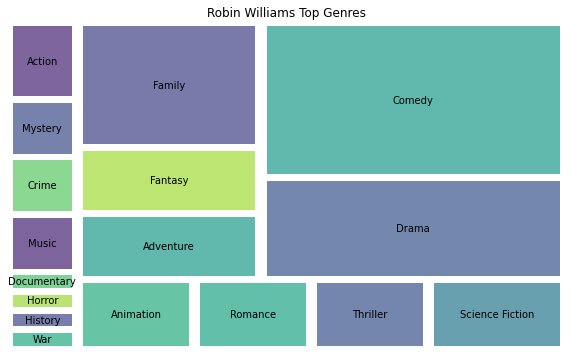

In [47]:
Robin_Williams_genres = get_actor_genre("Robin Williams",genres_list)
#Robin_Williams_genres.plot.pie(y="# of movies",legend=False,figsize=(10,10),title="Robin Williams Top Genres")
fig = plt.figure() 
fig.set_size_inches(10, 6)
squarify.plot(sizes=Robin_Williams_genres['# of movies'], label=Robin_Williams_genres.index, alpha=0.7,pad = True )
plt.axis('off')
plt.title("Robin Williams Top Genres")
plt.show()

### Summary of the graph : 
####  Most of the movies of Robin Williams in :  Comedy

#### 7- Morgan Freeman	

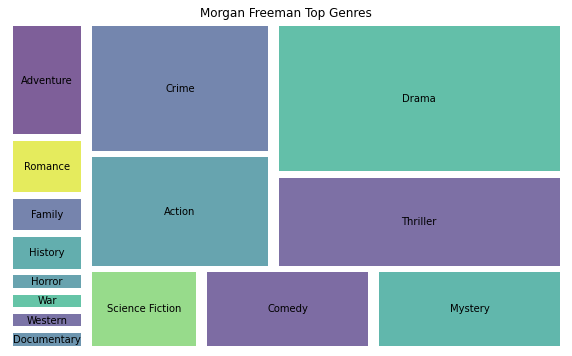

In [48]:
Morgan_Freeman_genres = get_actor_genre("Morgan Freeman",genres_list)
#Morgan_Freeman_genres.plot.pie(y="# of movies",legend=False,figsize=(10,10),title="Morgan Freeman Top Genres")
fig = plt.figure() 
fig.set_size_inches(10, 6)
squarify.plot(sizes=Morgan_Freeman_genres['# of movies'], label=Morgan_Freeman_genres.index, alpha=0.7,pad = True )
plt.axis('off')
plt.title("Morgan Freeman Top Genres")
plt.show()

### Summary of the graph : 
####  Most of the movies of Morgan Freeman in :  Drama

#### 8- John Goodman

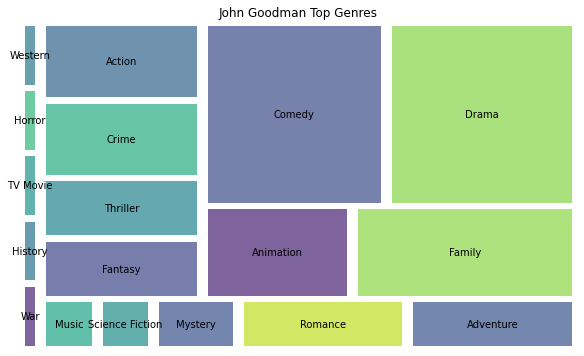

In [49]:
John_Goodman_genres = get_actor_genre("John Goodman",genres_list)
#John_Goodman_genres.plot.pie(y="# of movies",legend=False,figsize=(10,10),title="John Goodman Top Genres")
fig = plt.figure() 
fig.set_size_inches(10, 6)
squarify.plot(sizes=John_Goodman_genres['# of movies'], label=John_Goodman_genres.index, alpha=0.7,pad = True )
plt.axis('off')
plt.title("John Goodman Top Genres")
plt.show()

### Summary of the graph : 
####  Most of the movies of John Goodman in :  Drama

#### 9- John Cusack

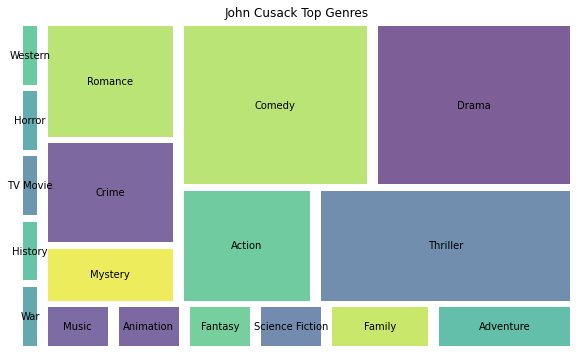

In [50]:
John_Cusack_genres = get_actor_genre("John Cusack",genres_list)
#John_Cusack_genres.plot.pie(y="# of movies",legend=False,figsize=(10,10),title="John Cusack Top Genres")
fig = plt.figure() 
fig.set_size_inches(10, 6)
squarify.plot(sizes=John_Cusack_genres['# of movies'], label=John_Cusack_genres.index, alpha=0.7,pad = True )
plt.axis('off')
plt.title("John Cusack Top Genres")
plt.show()

### Summary of the graph : 
####  Most of the movies of John Cusack in :  Drama

#### 10- Susan Sarandon	

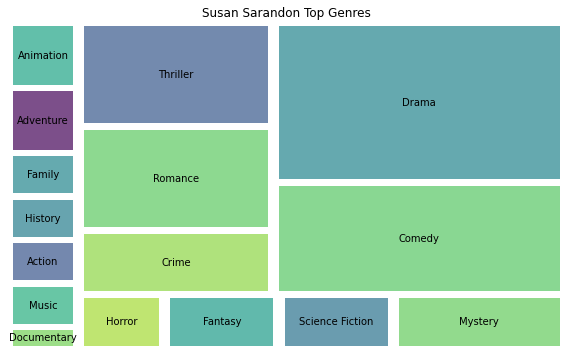

In [51]:
Susan_Sarandon_genres = get_actor_genre("Susan Sarandon",genres_list)
#Susan_Sarandon_genres.plot.pie(y="# of movies",legend=False,figsize=(10,10),title="Susan Sarandon Top Genres")
fig = plt.figure() 
fig.set_size_inches(10, 6)
squarify.plot(sizes=Susan_Sarandon_genres['# of movies'], label=Susan_Sarandon_genres.index, alpha=0.7,pad = True )
plt.axis('off')
plt.title("Susan Sarandon Top Genres")
plt.show()

### Summary of the graph : 
####  Most of the movies of Susan Sarandon in :  Drama

<a id='conclusion'></a>
## Conclusions
### Limitatoins : There is no limitations in our dataset